In [1]:
# Importing the libraries

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

%matplotlib inline


# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")


# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)


# Import psql to run queries 

import pandasql as psql

In [6]:
# load the dataset

bank=pd.read_csv(r"C:\Users\ashiy\Downloads\bank-direct-marketing-campaigns.csv",header=0)


# Copy the file

bank_bk=bank.copy()


# Display the first 5

bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
# Display the information of file

bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

In [8]:
# Check the unique values

bank.nunique()

age                78
job                12
marital             4
education           8
default             3
housing             3
loan                3
contact             2
month              10
day_of_week         5
campaign           42
pdays              27
previous            8
poutcome            3
emp.var.rate       10
cons.price.idx     26
cons.conf.idx      26
euribor3m         316
nr.employed        11
y                   2
dtype: int64

In [9]:
# Check the missing values

bank.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [10]:
# Check the duplicate values

bank.duplicated().any()

True

In [11]:
# Dispaly Duplicated values

bank_Dup=bank[bank.duplicated(keep='first')]
bank_Dup

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
10,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
11,25,services,single,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
16,35,blue-collar,married,basic.6y,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
31,59,technician,married,unknown,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
104,52,admin.,divorced,university.degree,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39985,27,admin.,single,high.school,no,no,no,cellular,jun,tue,2,999,0,nonexistent,-1.7,94.055,-39.8,0.761,4991.6,yes
40401,31,student,single,unknown,no,yes,no,cellular,aug,thu,2,999,0,nonexistent,-1.7,94.027,-38.3,0.904,4991.6,yes
40404,41,entrepreneur,married,university.degree,no,yes,no,cellular,aug,thu,1,999,0,nonexistent,-1.7,94.027,-38.3,0.904,4991.6,yes
40806,35,technician,married,professional.course,no,yes,no,cellular,sep,thu,1,999,2,failure,-1.1,94.199,-37.5,0.878,4963.6,no


In [12]:
# Remove duplicates

bank=bank.drop_duplicates()

In [13]:
bank=bank.reset_index(drop=True)
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [14]:
bank.duplicated().any()

False

In [15]:
bank['job'].value_counts()

admin.           9873
blue-collar      8835
technician       6404
services         3801
management       2820
retired          1683
entrepreneur     1405
self-employed    1386
housemaid        1028
unemployed        992
student           852
unknown           325
Name: job, dtype: int64

In [16]:
bank['job']=bank['job'].map({'admin.':0,'blue-collar':1,'technician':2,'services':3,'management':4,'retired':5,'entrepreneur':6,'self-employed':7,'housemaid':8,'unemployed':9,'student':10,'unknown':11})

In [17]:
bank['poutcome'].value_counts()

nonexistent    33858
failure         4174
success         1372
Name: poutcome, dtype: int64

In [18]:
bank['poutcome']=bank['poutcome'].map({'nonexistent':0,'failure':1,'success':2})


In [19]:
bank['default'].value_counts()

no         31135
unknown     8266
yes            3
Name: default, dtype: int64

In [20]:
bank['default']=bank['default'].map({'no':0,'unknown':1,'yes':2})


In [21]:
bank['loan'].value_counts()

no         32248
yes         6176
unknown      980
Name: loan, dtype: int64

In [22]:
bank['loan']=bank['loan'].map({'no':0,'unknown':1,'yes':2})


In [23]:
bank['y'].value_counts()

no     34806
yes     4598
Name: y, dtype: int64

In [24]:
bank['y']=bank['y'].map({'no':0,'yes':1})


In [25]:
bank['marital'].value_counts()

married     23869
single      10997
divorced     4459
unknown        79
Name: marital, dtype: int64

In [26]:
bank['marital']=bank['marital'].map({'unknown':0,'single':1,'married':2,'divorced':3})


In [27]:
bank['housing'].value_counts()

yes        20561
no         17863
unknown      980
Name: housing, dtype: int64

In [28]:
bank['housing']=bank['housing'].map({'no':0,'unknown':1,'yes':2})


In [29]:
bank['contact'].value_counts()

cellular     24673
telephone    14731
Name: contact, dtype: int64

In [30]:
bank['contact']=bank['contact'].map({'cellular':0,'telephone':1})


In [31]:
bank['month'].value_counts()

may    13315
jul     6698
aug     5719
jun     5245
nov     3910
apr     2535
oct      707
sep      564
mar      530
dec      181
Name: month, dtype: int64

In [32]:
bank['month']=bank['month'].map({'may':0,'jul':1,'aug':2,'jun':3,'nov':4,'apr':5,'oct':6,'sep':7,'mar':8,'dec':9})

In [33]:
bank['education'].value_counts()

university.degree      11561
high.school             9121
basic.9y                5785
professional.course     5018
basic.4y                3993
basic.6y                2222
unknown                 1686
illiterate                18
Name: education, dtype: int64

In [34]:
bank['education']=bank['education'].map({'university.degree':0,'high.school':1,'basic.9y':2,'professional.course':3,'basic.4y':4,'basic.6y':5,'unknown':6,'illiterate':7})

In [35]:
bank['day_of_week'].value_counts()

thu    8197
mon    8188
wed    7760
tue    7708
fri    7551
Name: day_of_week, dtype: int64

In [36]:
bank['day_of_week']=bank['day_of_week'].map({'thu':0,'mon':1,'wed':2,'tue':3,'fri':4})

In [37]:
del bank['emp.var.rate']

In [38]:
del bank['cons.price.idx']

In [39]:
del bank['euribor3m']

In [40]:
del bank['nr.employed']

In [41]:
del bank['cons.conf.idx']


In [42]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39404 entries, 0 to 39403
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   age          39404 non-null  int64
 1   job          39404 non-null  int64
 2   marital      39404 non-null  int64
 3   education    39404 non-null  int64
 4   default      39404 non-null  int64
 5   housing      39404 non-null  int64
 6   loan         39404 non-null  int64
 7   contact      39404 non-null  int64
 8   month        39404 non-null  int64
 9   day_of_week  39404 non-null  int64
 10  campaign     39404 non-null  int64
 11  pdays        39404 non-null  int64
 12  previous     39404 non-null  int64
 13  poutcome     39404 non-null  int64
 14  y            39404 non-null  int64
dtypes: int64(15)
memory usage: 4.5 MB


In [43]:
# Replacing the columns

bank.columns=bank.columns.str.replace(".","_")

In [44]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,y
0,56,8,2,4,0,0,0,1,0,1,1,999,0,0,0
1,57,3,2,1,1,0,0,1,0,1,1,999,0,0,0
2,37,3,2,1,0,2,0,1,0,1,1,999,0,0,0
3,40,0,2,5,0,0,0,1,0,1,1,999,0,0,0
4,56,3,2,1,0,0,2,1,0,1,1,999,0,0,0


In [45]:
# count the target or dependent variable by '0' & '1' and their proportion
# (>=10):1 the the data is inbalance data

y_count=bank.y.value_counts()
print("class 0",y_count[0])
print("class 1",y_count[1])
print("proportion:",round(y_count[0]/y_count[1],2),": 1")
print("Total bank records :",len(bank))

class 0 34806
class 1 4598
proportion: 7.57 : 1
Total bank records : 39404


In [46]:
# identifying independent and target variable

IndepVar=[]
for col in bank.columns:
    if col != 'y':
        IndepVar.append(col)
TarVar='y'
x=bank[IndepVar]
y=bank[TarVar]

In [47]:
 # Split the data into train and test (random sampling)

from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


# Display the shape for train & test data

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((27582, 14), (11822, 14), (27582,), (11822,))

In [48]:
# Load the file

EMResults=pd.read_csv(r"C:\Users\Dlc\Downloads\EMResults.csv",header=0)
EMResults

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Dlc\\Downloads\\EMResults.csv'

In [104]:
# Scaling the features by using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train = mmscaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train)

x_test = mmscaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test)

Model Name:  LogisticRegression()
Confusion matrix : 
 [[  233  1165]
 [  125 10299]]
Outcome values : 
 233 1165 125 10299
Classification report : 
               precision    recall  f1-score   support

           1       0.65      0.17      0.27      1398
           0       0.90      0.99      0.94     10424

    accuracy                           0.89     11822
   macro avg       0.77      0.58      0.60     11822
weighted avg       0.87      0.89      0.86     11822

Accuracy : 89.1 %
Precision : 65.1 %
Recall : 16.7 %
F1 Score : 0.265
Specificity or True Negative Rate : 98.8 %
Balanced Accuracy : 57.8 %
MCC : 0.291
roc_auc_score: 0.577


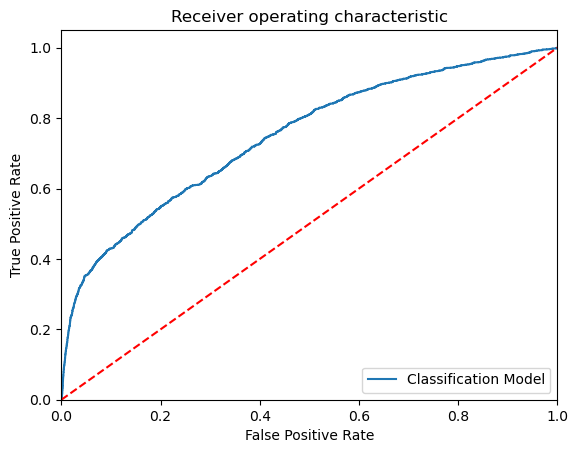

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[ 436  962]
 [1168 9256]]
Outcome values : 
 436 962 1168 9256
Classification report : 
               precision    recall  f1-score   support

           1       0.27      0.31      0.29      1398
           0       0.91      0.89      0.90     10424

    accuracy                           0.82     11822
   macro avg       0.59      0.60      0.59     11822
weighted avg       0.83      0.82      0.83     11822

Accuracy : 82.0 %
Precision : 27.2 %
Recall : 31.2 %
F1 Score : 0.29
Specificity or True Negative Rate : 88.8 %
Balanced Accuracy : 60.0 %
MCC : 0.188
roc_auc_score: 0.6


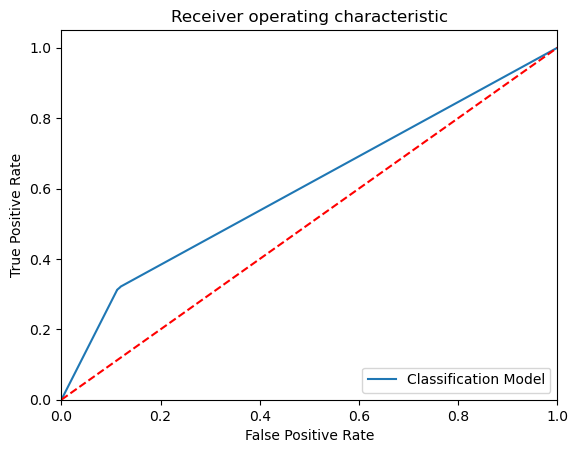

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[  327  1071]
 [  298 10126]]
Outcome values : 
 327 1071 298 10126
Classification report : 
               precision    recall  f1-score   support

           1       0.52      0.23      0.32      1398
           0       0.90      0.97      0.94     10424

    accuracy                           0.88     11822
   macro avg       0.71      0.60      0.63     11822
weighted avg       0.86      0.88      0.86     11822

Accuracy : 88.4 %
Precision : 52.3 %
Recall : 23.4 %
F1 Score : 0.323
Specificity or True Negative Rate : 97.1 %
Balanced Accuracy : 60.2 %
MCC : 0.296
roc_auc_score: 0.603


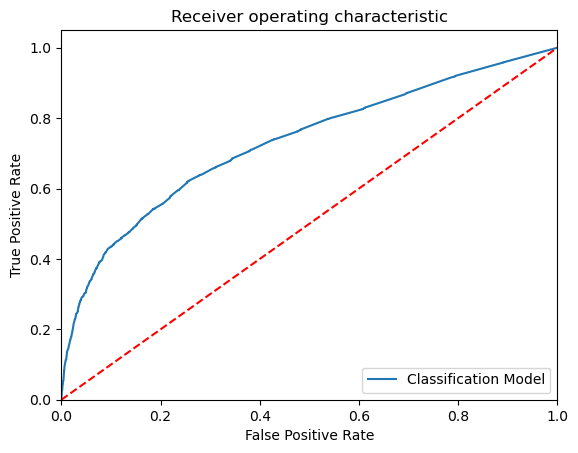

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[  324  1074]
 [  366 10058]]
Outcome values : 
 324 1074 366 10058
Classification report : 
               precision    recall  f1-score   support

           1       0.47      0.23      0.31      1398
           0       0.90      0.96      0.93     10424

    accuracy                           0.88     11822
   macro avg       0.69      0.60      0.62     11822
weighted avg       0.85      0.88      0.86     11822

Accuracy : 87.8 %
Precision : 47.0 %
Recall : 23.2 %
F1 Score : 0.31
Specificity or True Negative Rate : 96.5 %
Balanced Accuracy : 59.8 %
MCC : 0.271
roc_auc_score: 0.598


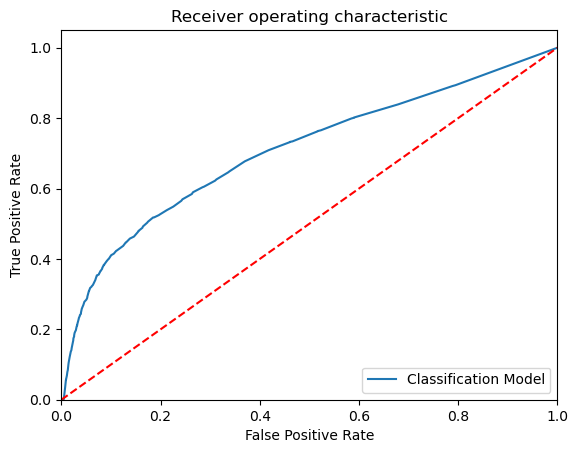

-----------------------------------------------------------------------------------------------------
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[  279  1119]
 [  238 10186]]
Outcome values : 
 279 1119 238 10186
Classification report : 
               precision    recall  f1-score   support

           1       0.54      0.20      0.29      1398
           0       0.90      0.98      0.94     10424

    accuracy                           0.89     11822
   macro avg       0.72      0.59      0.61     11822
weighted avg       0.86      0.89      0.86     11822

Accuracy : 88.5 %
Precision : 54.0 %
Recall : 20.0 %
F1 Score : 0.291
Specificity or True Negative Rate : 97.7 %
Balanced Accuracy : 58.8 %
MCC : 0.279
roc_auc_score: 0.588


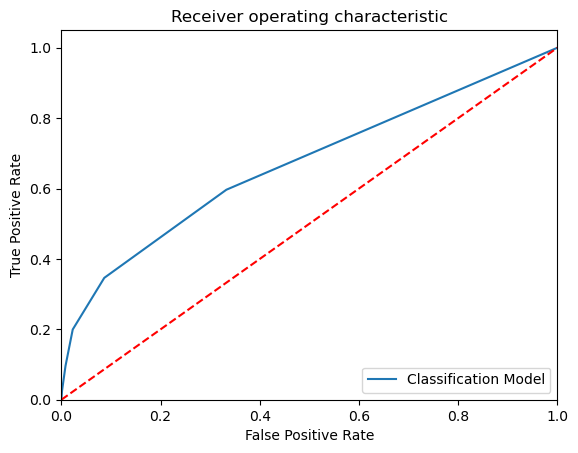

-----------------------------------------------------------------------------------------------------
Model Name:  GaussianNB()
Confusion matrix : 
 [[ 434  964]
 [ 704 9720]]
Outcome values : 
 434 964 704 9720
Classification report : 
               precision    recall  f1-score   support

           1       0.38      0.31      0.34      1398
           0       0.91      0.93      0.92     10424

    accuracy                           0.86     11822
   macro avg       0.65      0.62      0.63     11822
weighted avg       0.85      0.86      0.85     11822

Accuracy : 85.9 %
Precision : 38.1 %
Recall : 31.0 %
F1 Score : 0.342
Specificity or True Negative Rate : 93.2 %
Balanced Accuracy : 62.1 %
MCC : 0.266
roc_auc_score: 0.621


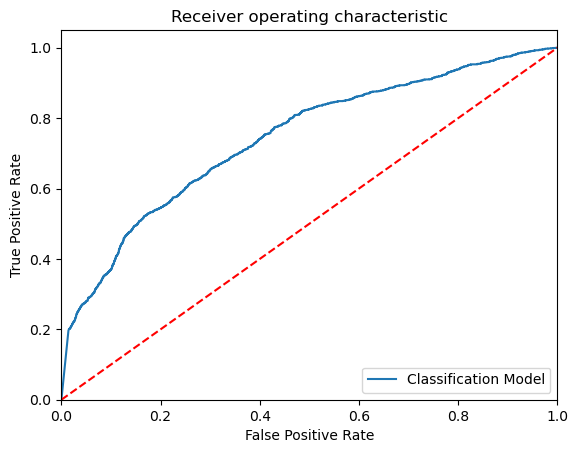

-----------------------------------------------------------------------------------------------------


In [105]:
# Build the Calssification models and compare the results

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
#from sklearn.svm import SVC

# Create objects of classification algorithms with default hyper-parameters

ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=5)
ModelGNB = GaussianNB()
#ModelSVM = SVC(probability=True)

# Evalution matrix for all the algorithms

#MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN, ModelGNB, ModelSVM]
MM = [ModelLR, ModelDC, ModelRF, ModelET,ModelKNN,ModelGNB]
for models in MM:
            
    # Train the model training dataset
    
    models.fit(x_train, y_train)
    
    # Prediction the model with test dataset
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    Model_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    #
    plt.plot(fpr, tpr, label= 'Classification Model' % Model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #----------------------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'True_Positive': tp,
               'False_Negative': fn, 
               'False_Positive': fp, 
               'True_Negative': tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    EMResults = EMResults.append(new_row, ignore_index=True)
    #----------------------------------------------------------------------------------------------------------
#======================================================================================================================>

In [106]:
EMResults

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),233,1165,125,10299,0.891,0.651,0.167,0.265,0.988,0.291,0.577338,0.578
1,DecisionTreeClassifier(),436,962,1168,9256,0.820,0.272,0.312,0.290,0.888,0.188,0.599912,0.600
2,"(DecisionTreeClassifier(max_features='auto', r...",327,1071,298,10126,0.884,0.523,0.234,0.323,0.971,0.296,0.602659,0.602
3,"(ExtraTreeClassifier(random_state=1945857962),...",324,1074,366,10058,0.878,0.470,0.232,0.310,0.965,0.271,0.598324,0.598
4,KNeighborsClassifier(),279,1119,238,10186,0.885,0.540,0.200,0.291,0.977,0.279,0.588369,0.588
5,GaussianNB(),434,964,704,9720,0.859,0.381,0.310,0.342,0.932,0.266,0.621454,0.621


In [111]:
# Logistic regression is the predicted model

y_pred1=ModelLR.predict(x_test)# Results1 = pd.DataFrame({'Cresit_Score_A':y_test, 'Credit_Score_P':y_pred1}) 
# Merge two Dataframes on index of both the dataframes 
ResultsFinal = credit_validation.merge(y_pred1, left_index=True, right_index=True) 
# Display 5 records randomly 
ResultsFinal.sample(5) 

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,y,y_A,y_P
16804,47,1,2,4,0,2,0,0,1,1,4,999,0,0,0,0,0
10801,60,0,2,0,0,0,0,1,3,2,3,999,0,0,1,1,0
12266,55,0,3,0,1,2,0,0,1,1,1,999,0,0,1,1,0
12348,38,2,2,3,1,0,0,0,1,1,3,999,0,0,0,0,0
12486,35,0,1,1,0,0,0,0,1,3,1,999,0,0,0,0,0
